# LSTM model

#### Housekeeping

In [77]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from Settings import columns, experiments
import Pipeline
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
pipeline = Pipeline.DataClean(columns, experiments['all'])
pipeline.clean_data()
pipeline.norm()
pipeline.split_label()
pipeline.train_val()

i made it to train val
imade it to else statement


In [8]:
pipeline.ytrain.shape

(215124, 12)

In [9]:
def reshape(data):
    return data.reshape(-1, 120, 14)

pipeline.xtrain = reshape(pipeline.xtrain)
# reshape(pipeline.ytrain)
pipeline.xval = reshape(pipeline.xval)
# reshape(pipeline.yval)
    

In [59]:
inputs = keras.Input(shape=(pipeline.xtrain[0].shape))

lstm = keras.layers.LSTM(units=12)  # units is dimentionality of output space

output = lstm(inputs)

# lstm = keras.layers.LSTM(12, return_sequences=True, return_state=True)
# whole_seq_output, final_memory_state, final_carry_state = lstm(inputs)

model= keras.Model(inputs, output)

In [70]:
inputs = keras.Input(shape=(pipeline.xtrain[0].shape))

lstm = keras.layers.LSTM(units=20)(inputs)

# output = lstm(inputs) # units is dimentionality of output space

# lstm = keras.layers.Flatten(input_shape=(pipeline.xtrain[0].shape))(lstm)

lstm = keras.layers.Dense(12)(lstm)


# lstm = keras.layers.Dense(12)(lstm)

# output = lstm(inputs)

model= keras.Model(inputs, lstm)

In [71]:
model.summary()

Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_41 (InputLayer)       [(None, 120, 14)]         0         
                                                                 
 lstm_44 (LSTM)              (None, 20)                2800      
                                                                 
 dense_6 (Dense)             (None, 12)                252       
                                                                 
Total params: 3,052
Trainable params: 3,052
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.compile(loss=keras.losses.MeanSquaredError(),
             optimizer='adam',
             metrics=['accuracy'])

In [73]:
secondtry = model.fit(pipeline.xtrain, pipeline.ytrain, epochs=2, validation_data=[pipeline.xval, pipeline.yval])

Epoch 1/2
6723/6723 [==============================] - 402s 59ms/step - loss: 91195.4922 - accuracy: 0.0906 - val_loss: 70032.5625 - val_accuracy: 0.4168
Epoch 2/2
6723/6723 [==============================] - 491s 73ms/step - loss: 90783.6484 - accuracy: 0.0918 - val_loss: 69701.7344 - val_accuracy: 0.3471


<IPython.core.display.Javascript object>


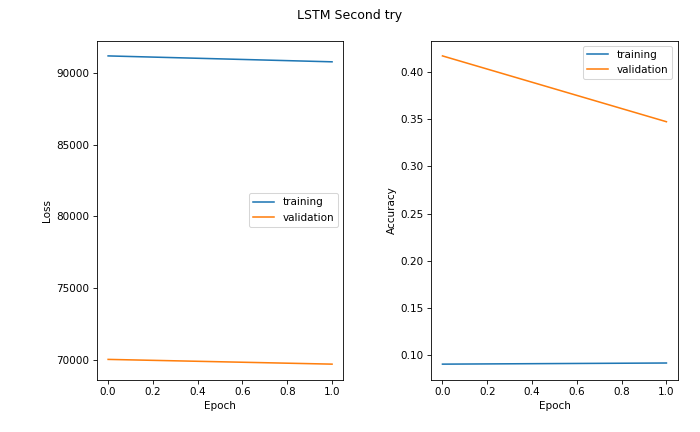

In [81]:
# Let's plot the change in loss and accuracy
fig, axs = plt.subplots(1, 2)

axs[0].plot(secondtry.history['loss'], label='training')
axs[0].plot(secondtry.history['val_loss'], label='validation')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(secondtry.history['accuracy'], label='training')
axs[1].plot(secondtry.history['val_accuracy'], label='validation')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend();

fig.suptitle('LSTM Second try')
plt.tight_layout()

In [33]:
history = model.fit(pipeline.xtrain, pipeline.ytrain, epochs=2, validation_data=[pipeline.xval, pipeline.yval])

Epoch 1/2
6723/6723 [==============================] - 389s 58ms/step - loss: 231996.2656 - accuracy: 0.0793 - val_loss: 112487.5703 - val_accuracy: 0.0737
Epoch 2/2
6723/6723 [==============================] - 394s 59ms/step - loss: 231996.1562 - accuracy: 0.0797 - val_loss: 112487.5703 - val_accuracy: 0.0746


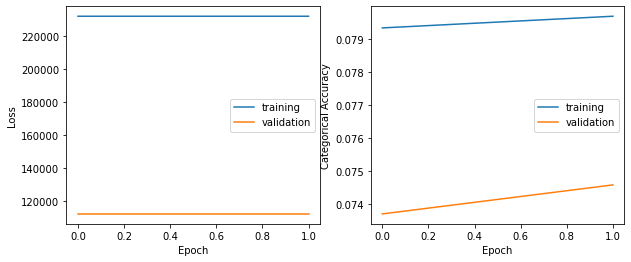

In [74]:
# Let's plot the change in loss and accuracy
fig, axs = plt.subplots(1, 2, figsize = (10,4))

axs[0].plot(history.history['loss'], label='training')
axs[0].plot(history.history['val_loss'], label='validation')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(history.history['accuracy'], label='training')
axs[1].plot(history.history['val_accuracy'], label='validation')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Categorical Accuracy')
axs[1].legend();

In [84]:
predict = model.predict(pipeline.xval)

<IPython.core.display.Javascript object>


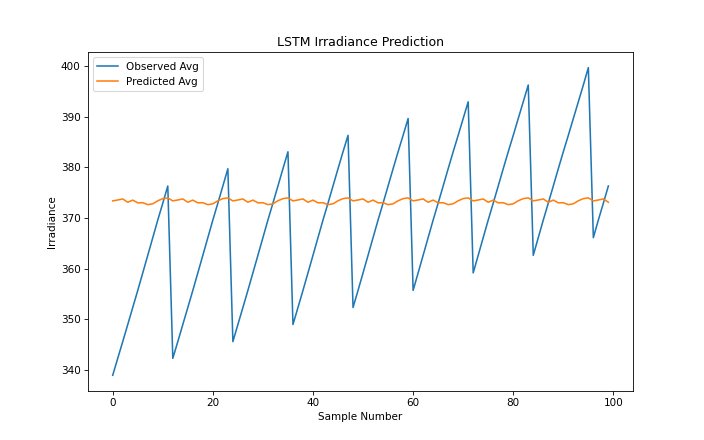

In [108]:
cfig, cax = plt.subplots()
cax.plot(pipeline.yval.reshape(-1)[900:1000], label='Observed Avg')
cax.plot(predict.reshape(-1)[900:1000], label='Predicted Avg')
cax.set_title('LSTM Irradiance Prediction')
cax.set_ylabel('Irradiance')
cax.set_xlabel('Sample Number')
cax.legend()


In [122]:
(512-32)/240

2.0